In [1]:
import numpy as np
import pandas as pd


Dataset Loading

In [2]:
df = pd.read_csv(r"D:\Downloads\Text HAM SPAM calssification.csv")

Dataset 

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Your gonna have to pick up a $1 burger for you...


Removing null values

In [4]:
df.dropna(inplace=True)

information of the data set

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 1790
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1726 non-null   object
 1   Message   1726 non-null   object
dtypes: object(2)
memory usage: 40.5+ KB


In [6]:
set(df["Category"])

{'ham', 'spam'}

Importing NLTK Natural Language Processing Package

In [7]:
import nltk

In [8]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [9]:
from nltk import WordNetLemmatizer, tokenize

converting Categories to Numerical

In [10]:
df["Category1"]=df["Category"].map({'ham':0, 'spam':1})

EDA

In [11]:
df["Category"].head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: Category, dtype: object

In [12]:
df["Category1"].head()

0    0
1    0
2    1
3    0
4    0
Name: Category1, dtype: int64

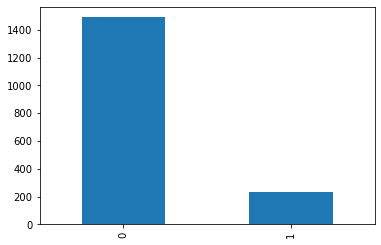

In [13]:
df["Category1"].value_counts().plot.bar();

In [14]:
df['length'] = df['Message'].apply(len)

In [15]:
df['length'].head()

0    111
1     29
2    155
3     49
4    108
Name: length, dtype: int64

NameError: name 'xlim' is not defined

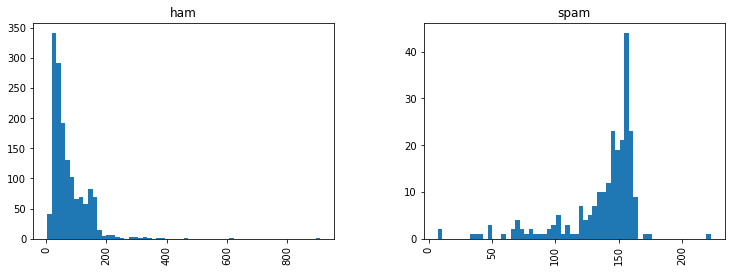

In [16]:
df.hist(column='length',by='Category',bins=60,figsize=(12,4));
xlim()

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [18]:
df["Message"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Your gonna have to pick up a $1 burger for you...
                              ...                        
1786                              I am in your office na.
1787                            Are you comingdown later?
1788                Super da:)good replacement for murali
1789             Da is good good player.why he is unsold.
1790    Hi. || Do u want | to join me with sts later? ...
Name: Message, Length: 1726, dtype: object

In [19]:
stop=stopwords.words("English")

In [20]:
import re


In [21]:
df["Message"]=df["Message"].apply(lambda x: re.sub("\W"," ", x))

In [22]:
wordsinmessage = [word_tokenize(i) for i in df["Message"] if i not in stop]

In [23]:
len(wordsinmessage)

1726

lemmatization

In [24]:
def lemmas(wordtokens):
    lemmatizer = WordNetLemmatizer()
    wordtokens = [lemmatizer.lemmatize(token)
                  for token in wordtokens]

    return wordtokens

In [25]:
wordsinlemm = []
for i in wordsinmessage:
        k = lemmas(i)
        wordsinlemm.append(k)

In [26]:
len(wordsinlemm)

1726

In [ ]:
wordsinlemm

In [28]:
 wordsinlemm = [str (item) for item in wordsinlemm]

In [29]:
df1 = pd.DataFrame(wordsinlemm)

In [30]:
df1.head()

,0
0,"['Go', 'until', 'jurong', 'point', 'crazy', 'A..."
1,"['Ok', 'lar', 'Joking', 'wif', 'u', 'oni']"
2,"['Free', 'entry', 'in', '2', 'a', 'wkly', 'com..."
3,"['U', 'dun', 'say', 'so', 'early', 'hor', 'U',..."
4,"['Your', 'gon', 'na', 'have', 'to', 'pick', 'u..."


TFIDF Vectorization

In [31]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf = TfidfVectorizer()

In [33]:
tfidfvectors = tfidf.fit_transform(wordsinlemm)

Random Over Sampling

In [64]:
from imblearn.over_sampling import RandomOverSampler

In [65]:
ros = RandomOverSampler(random_state=0)

In [68]:
X_resampled, y_resampled = ros.fit_resample(tfidfvectors, df["Category1"])

In [69]:
X_resampled

<2980x4357 sparse matrix of type '<class 'numpy.float64'>'
	with 50132 stored elements in Compressed Sparse Row format>

In [70]:
y_resampled

0       0
1       0
2       1
3       0
4       0
       ..
2975    1
2976    1
2977    1
2978    1
2979    1
Name: Category1, Length: 2980, dtype: int64

Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

Train Test Split

In [71]:
data_tfidf_train, data_tfidf_test, label_train, label_test =  train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [72]:
df["Category1"].shape

(1726,)

Loading Sklearn estimators

In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


MultinomialNB Modeltraining

In [74]:
spam_detect_modelNB = MultinomialNB().fit(data_tfidf_train, label_train)
pred_test_MNB = spam_detect_modelNB.predict(data_tfidf_test)
acc_train_MNB = accuracy_score(label_test, pred_test_MNB)
print(acc_train_MNB)
print(classification_report(label_test, pred_test_MNB))

0.9809843400447428
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       450
           1       0.97      1.00      0.98       444

    accuracy                           0.98       894
   macro avg       0.98      0.98      0.98       894
weighted avg       0.98      0.98      0.98       894



SVC Modeltraining

In [75]:
spam_detect_modelsvc = SVC().fit(data_tfidf_train, label_train)
pred_test_svc = spam_detect_modelsvc.predict(data_tfidf_test)
acc_train_svc = accuracy_score(label_test, pred_test_svc)
print(acc_train_svc)
print(classification_report(label_test, pred_test_svc))

0.9944071588366891
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       450
           1       0.99      1.00      0.99       444

    accuracy                           0.99       894
   macro avg       0.99      0.99      0.99       894
weighted avg       0.99      0.99      0.99       894



KNeighborsClassifier Modeltraining

In [76]:
spam_detect_modelknn = KNeighborsClassifier().fit(data_tfidf_train, label_train)
pred_test_knn = spam_detect_modelknn.predict(data_tfidf_test)
acc_train_knn = accuracy_score(label_test, pred_test_knn)
print(acc_train_knn)
print(classification_report(label_test, pred_test_knn))

0.9765100671140939
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       450
           1       0.95      1.00      0.98       444

    accuracy                           0.98       894
   macro avg       0.98      0.98      0.98       894
weighted avg       0.98      0.98      0.98       894



GradientBoostingClassifier Model Training

In [77]:
spam_detect_modelgb = GradientBoostingClassifier().fit(data_tfidf_train, label_train)
pred_test_gb = spam_detect_modelgb.predict(data_tfidf_test)
acc_train_gb = accuracy_score(label_test, pred_test_gb)
print(acc_train_gb)
print(classification_report(label_test, pred_test_gb))

0.9809843400447428
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       450
           1       0.97      0.99      0.98       444

    accuracy                           0.98       894
   macro avg       0.98      0.98      0.98       894
weighted avg       0.98      0.98      0.98       894



creating Multinomial Model

In [78]:
clfmb = Pipeline([("tfidftrans", TfidfVectorizer()),
               ("multi", MultinomialNB())])

In [79]:
clfmb.fit(wordsinlemm,df["Category1"])

Pipeline(steps=[('tfidftrans', TfidfVectorizer()), ('multi', MultinomialNB())])

creating SVC Model

In [80]:
clfsvc = Pipeline([("tfidftrans", TfidfVectorizer()),
               ("multi", SVC())])

In [81]:
clfsvc.fit(wordsinlemm,df["Category1"])

Pipeline(steps=[('tfidftrans', TfidfVectorizer()), ('multi', SVC())])

creating KNN Model

In [82]:
clfknn = Pipeline([("tfidftrans", TfidfVectorizer()),
               ("multi", KNeighborsClassifier())])

In [83]:
clfknn.fit(wordsinlemm,df["Category1"])

Pipeline(steps=[('tfidftrans', TfidfVectorizer()),
                ('multi', KNeighborsClassifier())])

creating GB Model

In [84]:
clfgb = Pipeline([("tfidftrans", TfidfVectorizer()),
               ("multi", GradientBoostingClassifier())])

In [85]:
clfgb.fit(wordsinlemm,df["Category1"])

Pipeline(steps=[('tfidftrans', TfidfVectorizer()),
                ('multi', GradientBoostingClassifier())])